### Get data from Reddit:

In [1]:
import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data_reddit():
    reddit = praw.Reddit(client_id='U-Io_Nq11-NMOA', client_secret='U7fed9PeISLyTTFIkMxRrsFHm-vkDw', 
                         user_agent='personal_self_project')
    
    topics = ['MachineLearning', 'DeepLearning', 'ImageProcessing', 'DataAnalysis', 'Python']
    
    posts = []
    for topic in topics:
        ml_subreddit = reddit.subreddit(topic)
        for post in ml_subreddit.hot(limit=100):
            if post.selftext!="":
                posts.append([post.subreddit, post.selftext])
    posts = pd.DataFrame(posts, columns=['subreddit', 'body'])
    display(posts.head())
    
    posts.to_csv("dm-05-self_project.csv")
    return posts

In [3]:
try:
    load_data_reddit()
    print("Load data from Reddit.")
except:
    print("Reddit API cannot be used. Let's use the CSV file.")

Version 7.0.0 of praw is outdated. Version 7.2.0 was released Wednesday February 24, 2021.


,subreddit,body
0,MachineLearning,This is a place to share machine learning rese...
1,MachineLearning,Project development presentation: [https://www...
2,MachineLearning,&#x200B;\n\nhttps://reddit.com/link/nds1x8/vid...
3,MachineLearning,I created a repository of pretrained models in...
4,MachineLearning,"I have often seen the ""representor theorem"" me..."


Load data from Reddit.


subreddit = reddit.subreddit('Nootropics')
top_subreddit = subreddit.top(limit=20)
print(list(top_subreddit))

### Read data:

In [4]:
df = pd.read_csv("dm-05-self_project.csv", header=0)
display(df.head())

,Unnamed: 0,subreddit,body
0,0,MachineLearning,This is a place to share machine learning rese...
1,1,MachineLearning,Project development presentation: [https://www...
2,2,MachineLearning,&#x200B;\n\nhttps://reddit.com/link/nds1x8/vid...
3,3,MachineLearning,I created a repository of pretrained models in...
4,4,MachineLearning,"I have often seen the ""representor theorem"" me..."


### Conduct analysis:

#### Import libraries:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

#### Obtain explanatory and response variables:

In [6]:
X = df['body']
y = df['subreddit']

#### Split train and test sets:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Using Naive Bayes Classifier:

#### Collect words  

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vocab = vectorizer. get_feature_names()
print('Vocabulary size:', len(vocab))
print(vocab[:10])

Vocabulary size: 5662
['00', '000', '01', '01045', '01060', '01595', '020', '02021', '02579', '02667']


#### Make BoW:

In [9]:
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('X_train_bow:')
print(repr(X_train_bow))
print('X_test_bow:')
print(repr(X_test_bow))

X_train_bow:
<311x5662 sparse matrix of type '<class 'numpy.int64'>'
	with 22603 stored elements in Compressed Sparse Row format>
X_test_bow:
<56x5662 sparse matrix of type '<class 'numpy.int64'>'
	with 3926 stored elements in Compressed Sparse Row format>


#### Display BoW:

In [10]:
Xbow = pd.DataFrame(X_train_bow.toarray(), 
                    index=y_train, columns=vocab)
display(Xbow.head())

,00,000,01,01045,01060,01595,020,02021,02579,02667,...,zipped,zoi9t5v223z61,zoom,zooming,zotero,zub3yv6im9c11,zukin,zurich,zvdxsv1,zvdxsv1_qdo9jpyvz0msxq
subreddit,,,,,,,,,,,,,,,,,,,,,
Python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MachineLearning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MachineLearning,0,0,0,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imageprocessing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Training of Naive Bayes Classifier:

In [11]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print(model.classes_)
train_score = model.score(X_train_bow, y_train)
print('Train accuracy:', train_score)

['MachineLearning' 'Python' 'dataanalysis' 'deeplearning'
 'imageprocessing']
Train accuracy: 0.9614147909967846


#### Prediction using naive Bayes classifier after training  

In [12]:
proba = model.predict_proba(X_test_bow)
results = pd.DataFrame(proba, columns=model.classes_)
y_pred = model.predict(X_test_bow)
print(y_pred)

['dataanalysis' 'MachineLearning' 'Python' 'dataanalysis'
 'MachineLearning' 'MachineLearning' 'imageprocessing' 'MachineLearning'
 'dataanalysis' 'MachineLearning' 'Python' 'MachineLearning'
 'dataanalysis' 'MachineLearning' 'dataanalysis' 'Python' 'dataanalysis'
 'MachineLearning' 'dataanalysis' 'dataanalysis' 'Python'
 'imageprocessing' 'MachineLearning' 'imageprocessing' 'MachineLearning'
 'dataanalysis' 'Python' 'imageprocessing' 'MachineLearning'
 'MachineLearning' 'MachineLearning' 'MachineLearning' 'dataanalysis'
 'dataanalysis' 'Python' 'MachineLearning' 'dataanalysis' 'Python'
 'Python' 'imageprocessing' 'MachineLearning' 'dataanalysis'
 'deeplearning' 'MachineLearning' 'MachineLearning' 'dataanalysis'
 'imageprocessing' 'imageprocessing' 'imageprocessing' 'Python'
 'imageprocessing' 'dataanalysis' 'MachineLearning' 'MachineLearning'
 'MachineLearning' 'deeplearning']


#### Prediction accuracy:

In [13]:
print(accuracy_score(y_pred, y_test))

0.625


### Using neural network:

#### Import libraries

In [14]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

#### Embed training data:

In [15]:
embedded_sentences = [one_hot(word, len(vocab)) for word in X_train]
print(embedded_sentences[0])

[5163, 1209, 2379, 2469, 4764, 5418, 2705, 3225, 4641, 2396, 2483, 242, 5559, 24, 267, 669, 2669, 475, 3464, 4736, 3128, 794, 5559, 4834, 5559, 2529, 5163, 5484, 203, 475, 5469, 1156, 5082, 2119, 5238, 1632, 2759]


In [16]:
X_train_nn = pad_sequences(embedded_sentences, len(vocab), padding='post')
print(X_train_nn)

[[5163 1209 2379 ...    0    0    0]
 [1383 2754  517 ...    0    0    0]
 [4759 4297 3225 ...    0    0    0]
 ...
 [ 517 1604 2941 ...    0    0    0]
 [2839 5082 1017 ...    0    0    0]
 [4641 2282 3088 ...    0    0    0]]


#### Create neural network model:

In [17]:
model = Sequential()
model.add(Embedding(len(vocab), 20, input_length=len(vocab)))
model.add(Flatten())
model.add(Dense(5, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5662, 20)          113240    
_________________________________________________________________
flatten (Flatten)            (None, 113240)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 566205    
Total params: 679,445
Trainable params: 679,445
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
y_train_nn = pd.get_dummies(y_train)
display(y_train_nn)

,MachineLearning,Python,dataanalysis,deeplearning,imageprocessing
304,0,1,0,0,0
81,1,0,0,0,0
14,1,0,0,0,0
360,0,1,0,0,0
197,0,0,0,0,1
...,...,...,...,...,...
60,1,0,0,0,0
256,0,0,1,0,0
130,0,0,0,1,0
53,1,0,0,0,0


In [20]:
history = model.fit(X_train_nn, y_train_nn.values, epochs=50, verbose=1, validation_split=0.2, callbacks=EarlyStopping(monitor='val_loss', patience=5))

Epoch 1/50
8/8 [==============================] - 4s 432ms/step - loss: 0.6484 - acc: 0.1831 - val_loss: 0.5566 - val_acc: 0.1429
Epoch 2/50
8/8 [==============================] - 1s 86ms/step - loss: 0.5379 - acc: 0.2213 - val_loss: 0.5242 - val_acc: 0.3016
Epoch 3/50
8/8 [==============================] - 1s 90ms/step - loss: 0.5294 - acc: 0.2402 - val_loss: 0.5091 - val_acc: 0.1905
Epoch 4/50
8/8 [==============================] - 1s 90ms/step - loss: 0.4813 - acc: 0.3341 - val_loss: 0.4884 - val_acc: 0.3016
Epoch 5/50
8/8 [==============================] - 1s 87ms/step - loss: 0.4714 - acc: 0.2780 - val_loss: 0.4972 - val_acc: 0.2063
Epoch 6/50
8/8 [==============================] - 1s 96ms/step - loss: 0.4476 - acc: 0.4758 - val_loss: 0.4885 - val_acc: 0.3016
Epoch 7/50
8/8 [==============================] - 1s 106ms/step - loss: 0.4377 - acc: 0.6052 - val_loss: 0.4867 - val_acc: 0.3810
Epoch 8/50
8/8 [==============================] - 1s 98ms/step - loss: 0.4101 - acc: 0.8197 - v

#### Accuracy:

In [21]:
loss, accuracy = model.evaluate(X_train_nn, y_train_nn, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 83.279741


#### Predict using test data:

In [22]:
X_test_nn = [one_hot(word, len(vocab)) for word in X_test]
X_test_nn = pad_sequences(X_test_nn, len(vocab), padding='post')

In [23]:
y_test_nn = pd.get_dummies(y_test)

In [24]:
score = model.evaluate(X_test_nn, y_test_nn, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2/2 [==============================] - 0s 12ms/step - loss: 0.5073 - acc: 0.4464
Test Score: 0.5072640180587769
Test Accuracy: 0.4464285671710968


#### Plot loss and accuracy values:

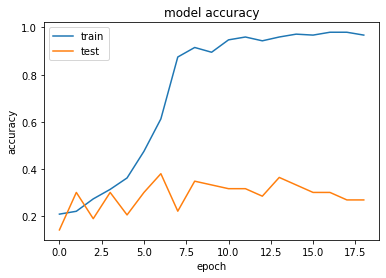

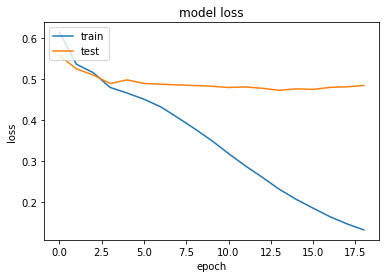

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Conclusion:

1. Naive Bayes Classifier seems to work better than Neural Network model for this dataset.
2. Test accuracy for this dataset is low for both models, which may be attributed to following reasons:<br>
a/ Small number of training observations <br>
b/ Similarities between labels makes it difficult for even human to classify <br>
c/ Posts on Reddit are often published with pictures and external links, which means in many cases, important contents are mainly in these pictures and links rather than on the body of posts.<br>
3. Potential improvements: <br>
a/ Better preprocessing words: get rid of numbers, special characters, etc. <br>
b/ Change parameters in the neural network model. <br>
c/ Try other models for text classification